In [1]:
import pandas as pd
import os
from bs4 import BeautifulSoup as BS
from selenium import webdriver
import requests

In [2]:
url = 'https://www.goibibo.com/hotels/hotels-in-shimla-ct/'

In [3]:
os.chdir('/home/ujjawal/Downloads')

In [4]:
browser=webdriver.Chrome('./chromedriver')

In [5]:
browser.get(url)

In [6]:
html=browser.page_source

In [7]:
soup=BS(html,"html.parser")

In [8]:
for item in soup.find_all('img'):
    print(item['src'])

https://cdn1.goibibo.com/voy_mmt/t_g/htl-imgs/200808052118502029-146e0018256711ebb9590242ac110002.jpg
https://cdn1.goibibo.com/voy_mmt/t_r/htl-imgs/200808052118502029-8a0cf1da029111e9b48e0242ac110002.jpg
https://cdn1.goibibo.com/voy_mmt/t_r/htl-imgs/200808052118502029-9c7359dc02f611e7a5b90224510f5e5b.jpg
https://cdn1.goibibo.com/voy_ing/t_r/be57d6ba780111e790c40a4cef95d023.jpg
https://cdn1.goibibo.com/voy_ing/t_r/f9836448780111e7b580025f77df004f.jpg
https://gos3.ibcdn.com/map-1626422501.png
https://gos3.ibcdn.com/map-1626422501.png
data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7
data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7
data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7
data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7
data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7
data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABA

In [9]:
[item['src']for item in soup.find_all('img')][24]

'https://mmt.servedbyadbutler.com/getad.img/;libID=3266486'

In [10]:
image = [item['src']for item in soup.find_all('img')][24]

In [11]:
with open('ads'+'.jpg', 'wb') as f:
    im = requests.get(image)
    f.write(im.content)

Here in the next line we can see that we have successfully scrapped the ad image from the website

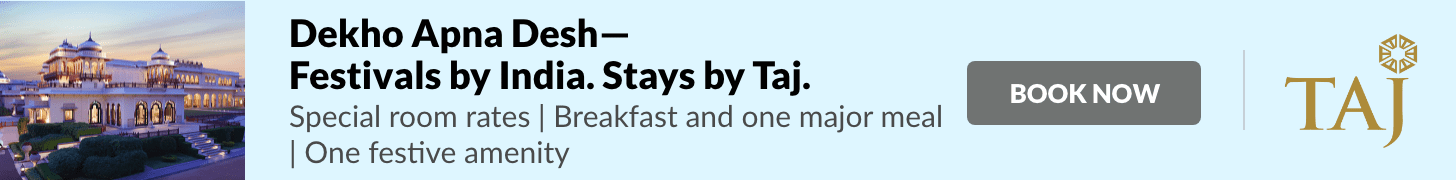

In [12]:
from PIL import Image
img_PIL = Image.open(r'ads.jpg')
img_PIL.show()

In [13]:
import easyocr

In [14]:
im_1_path = 'ads.jpg'

In [15]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [16]:
result = recognize_text(im_1_path)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[286, 10], [632, 10], [632, 61], [286, 61]],
  'Dekho Apna Desh _',
  0.4625980643645457),
 ([[284, 52], [818, 52], [818, 103], [284, 103]],
  'Festivals by India: Stays by Taj:',
  0.7151139885063629),
 ([[1006, 80], [1164, 80], [1164, 110], [1006, 110]],
  'BOOKNOW',
  0.6863753005062864),
 ([[285, 101], [537, 101], [537, 139], [285, 139]],
  'Special room rates',
  0.9838222469056163),
 ([[550, 101], [949, 101], [949, 137], [550, 137]],
  'Breakfast and one major meal',
  0.7525245633012324),
 ([[1279, 65], [1418, 65], [1418, 150], [1279, 150]],
  'TAJ',
  0.9667167377676437),
 ([[301, 137], [575, 137], [575, 173], [301, 173]],
  'One festive amenity',
  0.997186775564475)]

In [17]:
result[0][1]

'Dekho Apna Desh _'

In [18]:
text = [i[1] for i in result]
text

['Dekho Apna Desh _',
 'Festivals by India: Stays by Taj:',
 'BOOKNOW',
 'Special room rates',
 'Breakfast and one major meal',
 'TAJ',
 'One festive amenity']

In [19]:
call_button = text[2]
call_button

'BOOKNOW'